In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_jobs_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,company text,job_state,age,python,R,spark,aws,excel,sql
0,"Senior Analyst, Statistical Programming",84 - 112,Join a Legacy of Innovation 110 Years and Coun...,4.0,"Daiichi Sankyo, Inc.\n4.0","Basking Ridge, NJ",10000+ Employees,1899,Company - Public,Biotech & Pharmaceuticals,...,98.0,"Daiichi Sankyo, Inc.\n",NJ,124,0,1,0,0,0,0
1,Bioinformatics & Data Scientist,98 - 118,"Infinity Bio Inc, an innovative immunology ser...",-1.0,"Infinity Bio, Inc.","Baltimore, MD",-1,-1,-1,-1,...,108.0,"Infinity Bio, Inc.",MD,-1,1,0,0,1,1,0
2,Information Systems Manager - Data,120 - 130,Information Systems Manager with Data focus ne...,4.0,The Reserves Network Inc\n4.0,"Omaha, NE",51 to 200 Employees,-1,Company - Private,HR Consulting,...,125.0,The Reserves Network Inc\n,NE,-1,1,0,1,1,0,1
3,Senior Data Scientist,141 - 199,"TDI Technologies, Inc. (TDI) is seeking candid...",4.7,"TDI Technologies, Inc.\n4.7","Washington, DC",51 to 200 Employees,1988,Company - Private,Computer Hardware Development,...,170.0,"TDI Technologies, Inc.\n",DC,35,0,0,0,0,0,0
4,Sr. Data Scientist (Bilingual Korean),93 - 154,At LG we make products and services that make ...,2.8,LG Electronics\n2.8,"Englewood Cliffs, NJ",1001 to 5000 Employees,1952,Subsidiary or Business Segment,Consumer Electronics & Appliances Stores,...,123.5,LG Electronics\n,NJ,71,1,1,0,1,0,1


In [4]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python,R,spark,aws,excel,sql
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.179825,1464.263158,0.026316,0.570175,104.447368,151.938596,128.192982,43.605263,0.719298,0.096491,0.254386,0.324561,0.456140,0.596491
std,1.751519,860.464497,0.160779,0.497237,33.243295,56.961761,42.823858,45.793808,0.451326,0.296567,0.437438,0.470278,0.500272,0.492767
min,-1.000000,-1.000000,0.000000,0.000000,42.000000,55.000000,50.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.225000,461.750000,0.000000,0.000000,82.250000,121.000000,102.625000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1942.000000,0.000000,1.000000,98.000000,142.000000,120.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,1994.750000,0.000000,1.000000,120.000000,165.000000,144.000000,76.250000,1.000000,0.000000,0.750000,1.000000,1.000000,1.000000
max,5.000000,2021.000000,1.000000,1.000000,300.000000,500.000000,400.000000,173.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# title simplification

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
# seniority level parsing
    
def seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    if 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [6]:
df['job_simplify'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simplify.value_counts()

data scientist    66
na                24
data analyst       9
mle                7
director           4
manager            2
data engineer      2
Name: job_simplify, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        64
senior    49
junior     1
Name: seniority, dtype: int64

In [9]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      5141
1      3964
2      4654
3      1650
4      5357
       ... 
109    2181
110    4216
111    5527
112    8706
113    4520
Name: desc_len, Length: 114, dtype: int64

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'job_simplify',
       'seniority', 'desc_len'],
      dtype='object')

In [11]:
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [12]:
df[df.hourly == 1][['min_salary', 'max_salary', 'hourly']]

,min_salary,max_salary,hourly
51,100,150,1
85,208,208,1
107,100,110,1


In [13]:
df['company text'] = df['company text'].apply(lambda x: x.replace('\n',''))
df['company text']

0          Daiichi Sankyo, Inc.
1            Infinity Bio, Inc.
2      The Reserves Network Inc
3        TDI Technologies, Inc.
4                LG Electronics
                 ...           
109    Talentech Consulting LLC
110            MATRIX Resources
111                       Hertz
112             CGI Group, Inc.
113                      Altria
Name: company text, Length: 114, dtype: object

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python,R,spark,aws,excel,sql,desc_len
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.179825,1464.263158,0.026316,0.570175,106.236842,153.991228,128.192982,43.605263,0.719298,0.096491,0.254386,0.324561,0.456140,0.596491,4780.412281
std,1.751519,860.464497,0.160779,0.497237,33.832828,55.927813,42.823858,45.793808,0.451326,0.296567,0.437438,0.470278,0.500272,0.492767,2126.642103
min,-1.000000,-1.000000,0.000000,0.000000,42.000000,58.000000,50.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.225000,461.750000,0.000000,0.000000,84.000000,121.250000,102.625000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3460.500000
50%,3.800000,1942.000000,0.000000,1.000000,98.000000,144.500000,120.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4479.000000
75%,4.000000,1994.750000,0.000000,1.000000,120.000000,165.750000,144.000000,76.250000,1.000000,0.000000,0.750000,1.000000,1.000000,1.000000,5899.500000
max,5.000000,2021.000000,1.000000,1.000000,300.000000,500.000000,400.000000,173.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14131.000000


<AxesSubplot:>

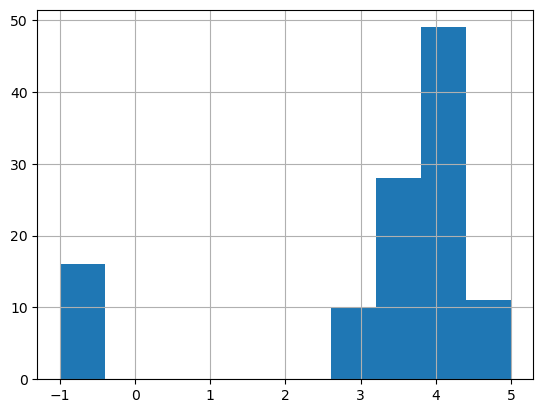

In [15]:
df.Rating.hist()

<AxesSubplot:>

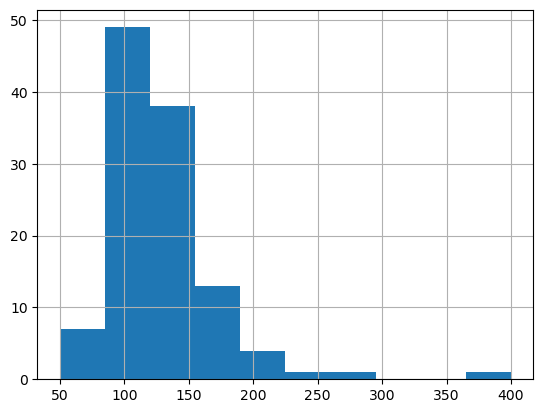

In [16]:
df.avg_salary.hist()

<AxesSubplot:>

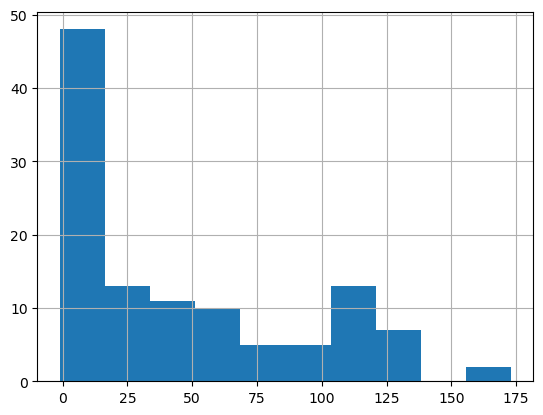

In [17]:
df.age.hist()  # exponential distribution - normalize to use

<AxesSubplot:>

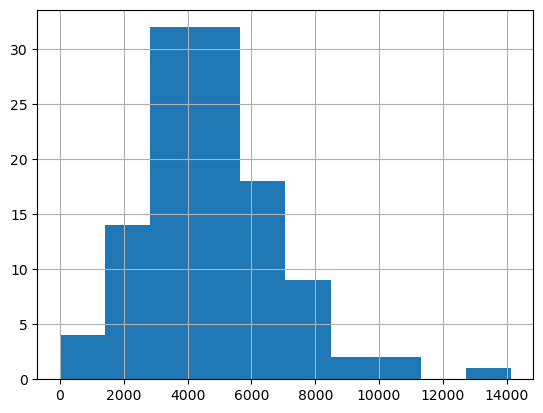

In [18]:
df.desc_len.hist()

<AxesSubplot:>

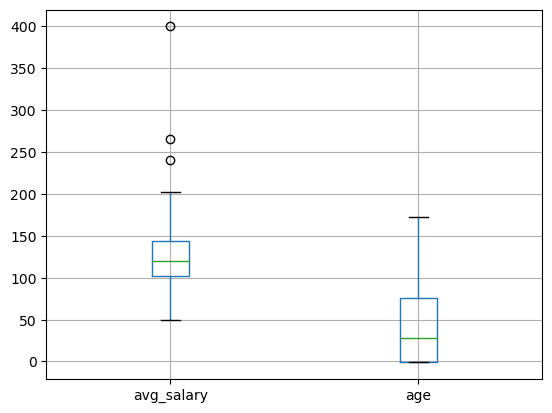

In [19]:
df.boxplot(['avg_salary','age'])

<AxesSubplot:>

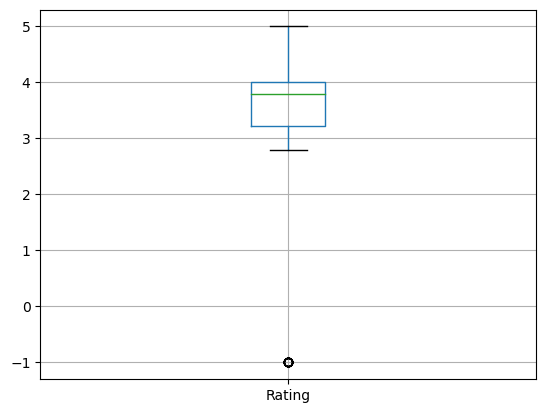

In [20]:
df.boxplot('Rating')

In [21]:
df[['avg_salary','age','Rating','desc_len']].corr()

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,-0.021865,0.083355,0.006193
age,-0.021865,1.000000,0.321461,0.203629
Rating,0.083355,0.321461,1.000000,0.288159
desc_len,0.006193,0.203629,0.288159,1.000000


<AxesSubplot:>

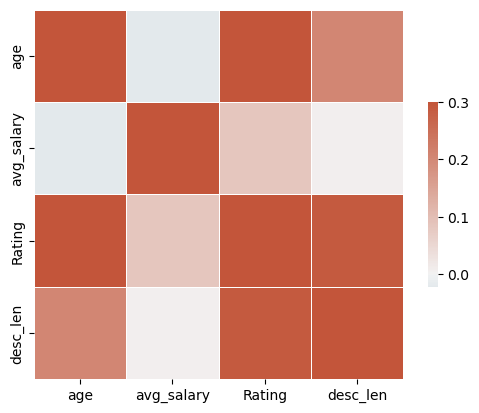

In [22]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'job_simplify',
       'seniority', 'desc_len'],
      dtype='object')

In [24]:
df_cat = df[['Location', 'Size','Type of ownership','Industry', 'Sector', 'Revenue','company text', 'job_state', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'job_simplify','seniority']]

Graph for Location: total = 76


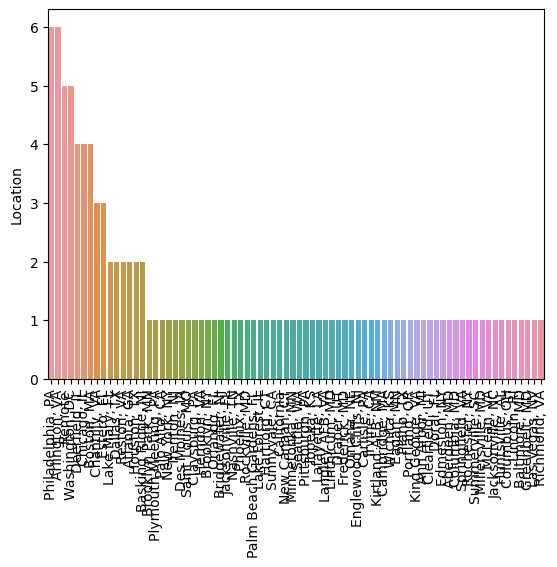

Graph for Size: total = 9


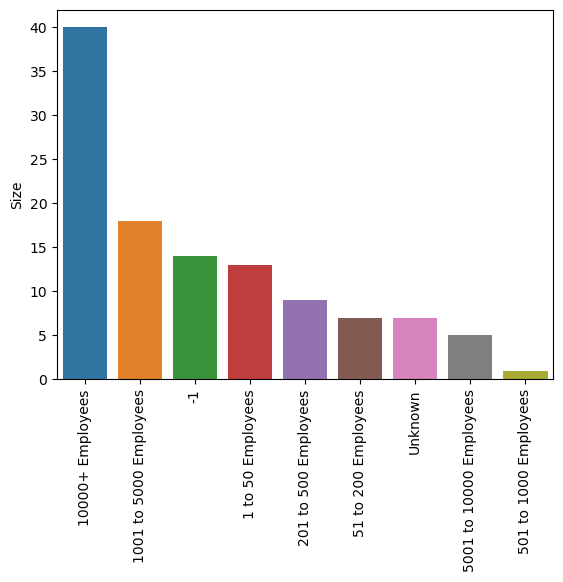

Graph for Type of ownership: total = 7


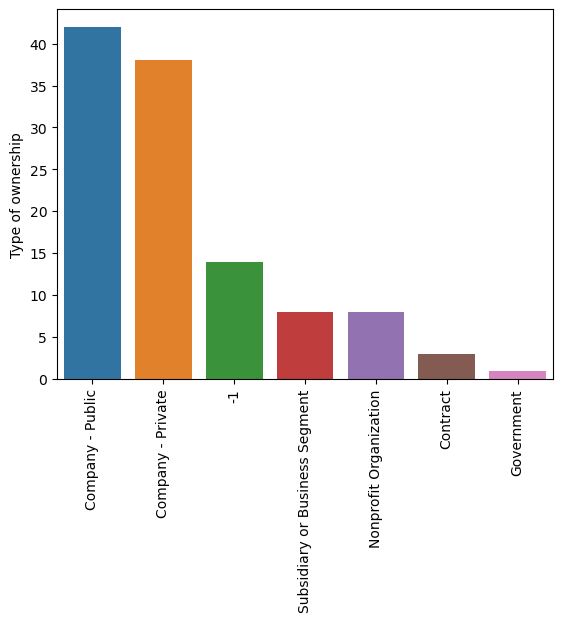

Graph for Industry: total = 32


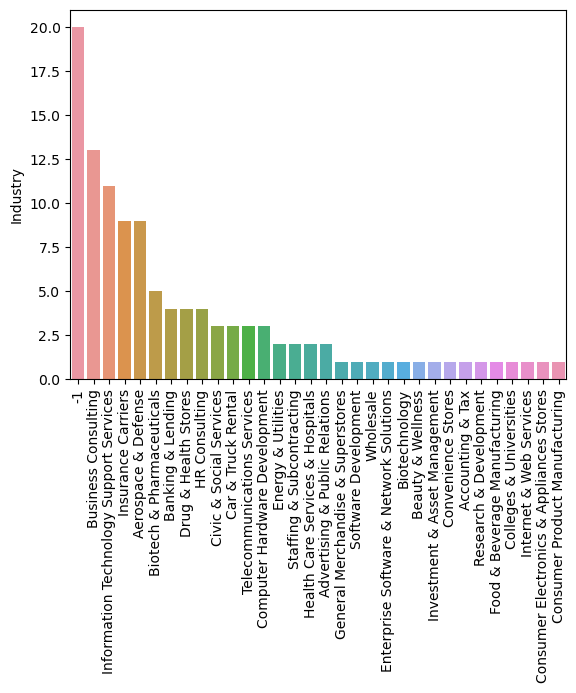

Graph for Sector: total = 18


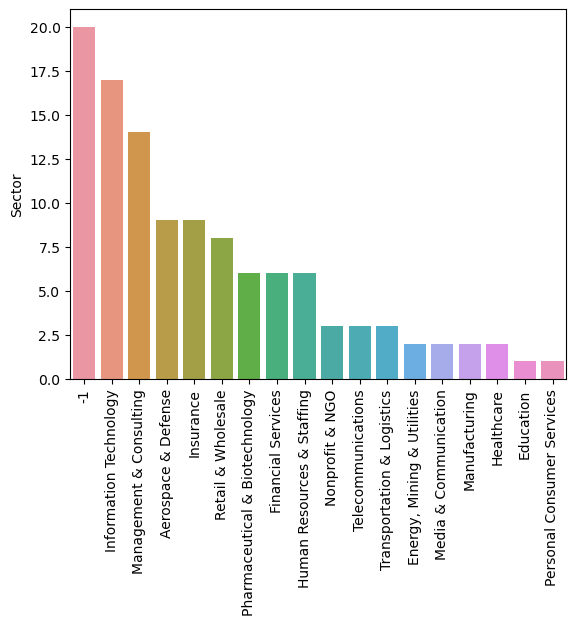

Graph for Revenue: total = 10


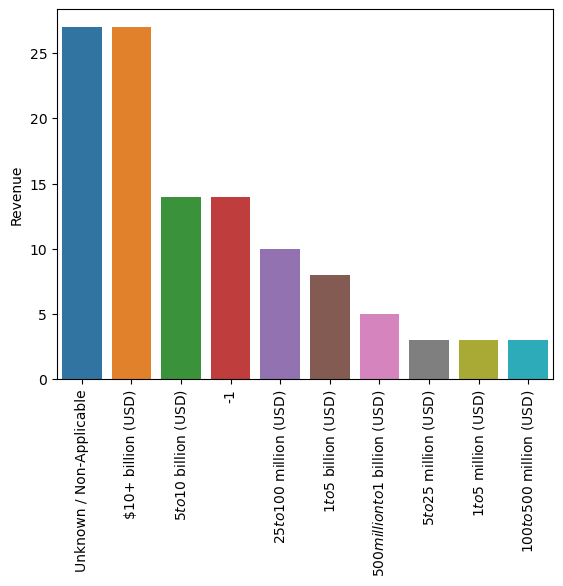

Graph for company text: total = 92


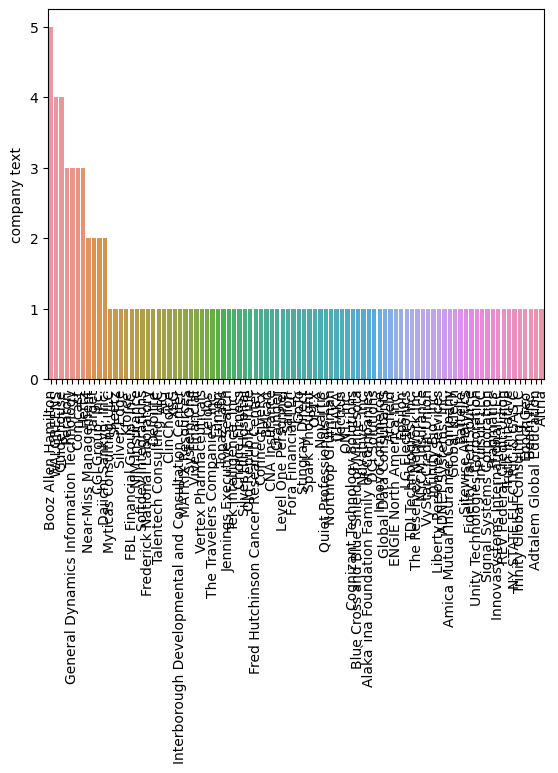

Graph for job_state: total = 31


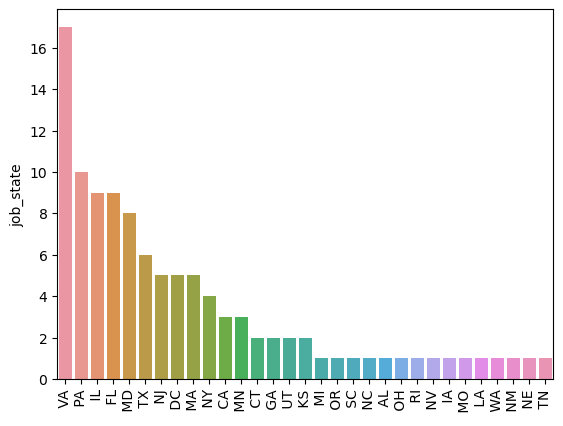

Graph for python: total = 2


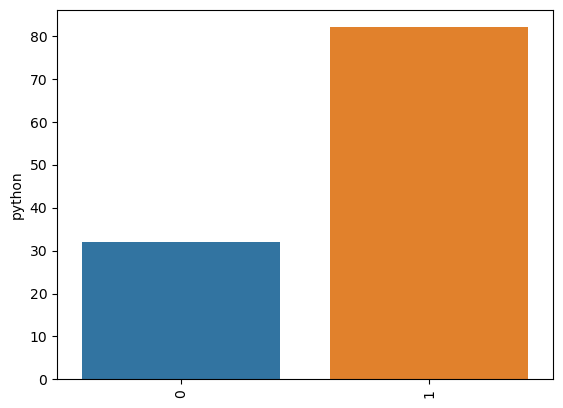

Graph for R: total = 2


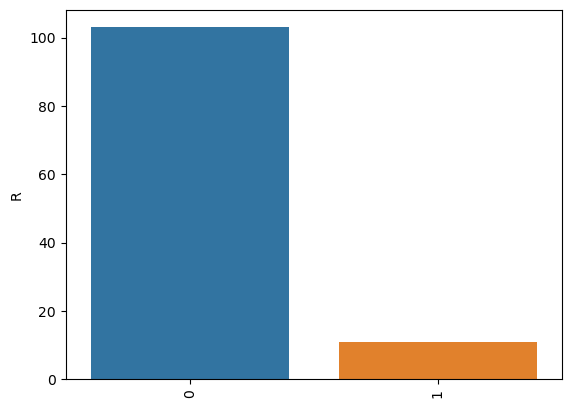

Graph for spark: total = 2


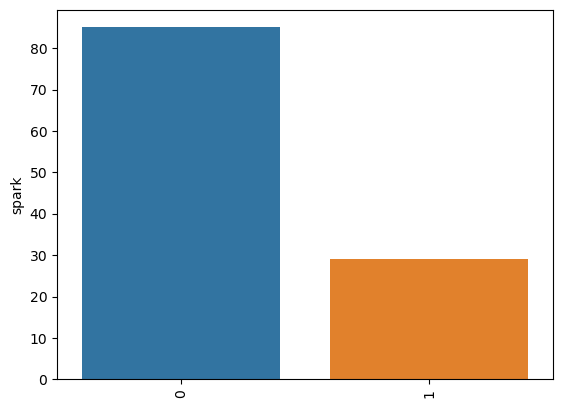

Graph for aws: total = 2


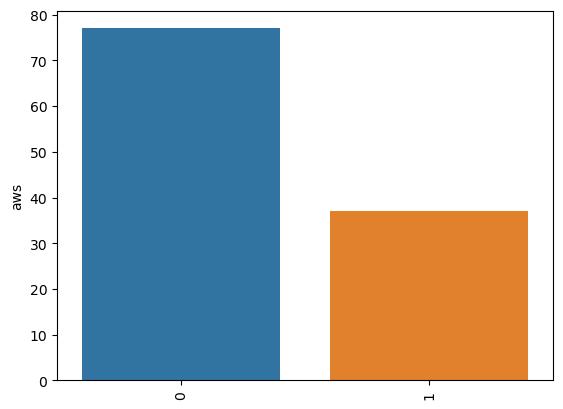

Graph for excel: total = 2


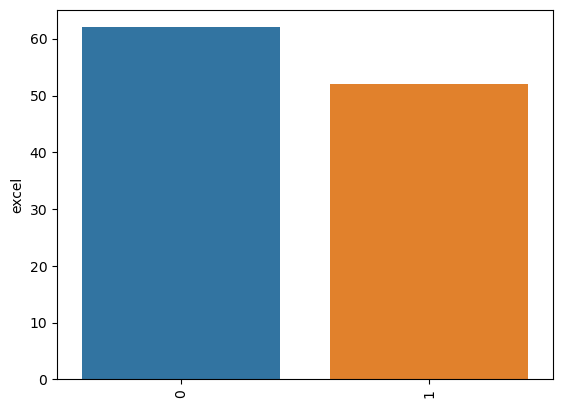

Graph for sql: total = 2


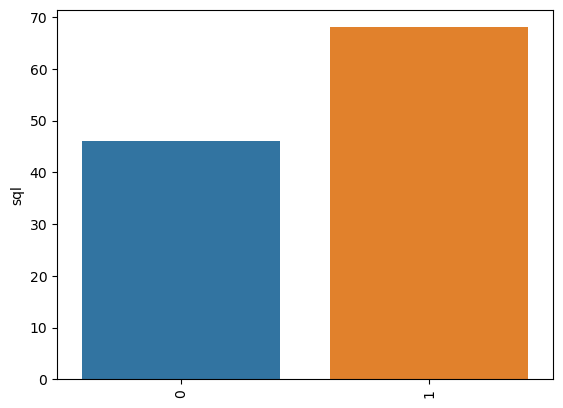

Graph for job_simplify: total = 7


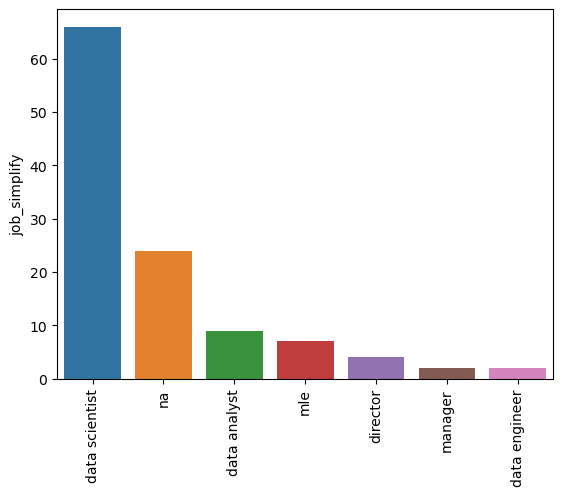

Graph for seniority: total = 3


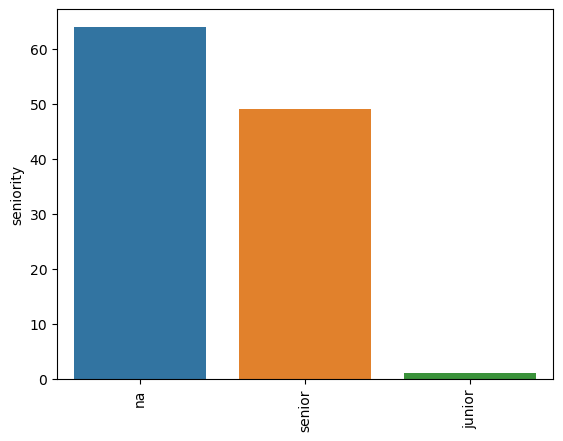

In [25]:
for i in df_cat.columns:
    cat_ind = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i,len(cat_ind)))
    chart = sns.barplot(x = cat_ind.index, y = cat_ind)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location: total = 20


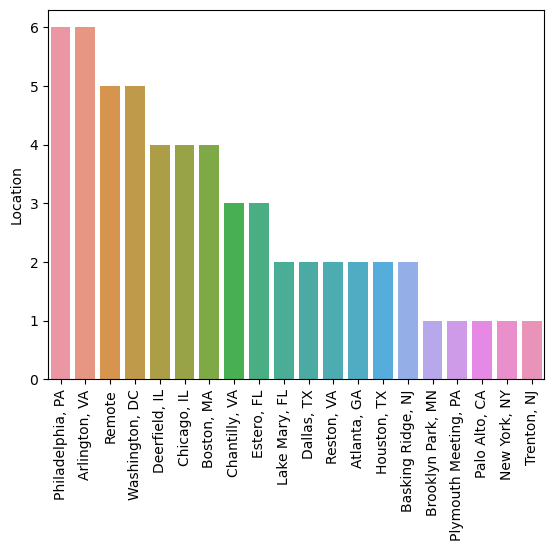

Graph for company text: total = 20


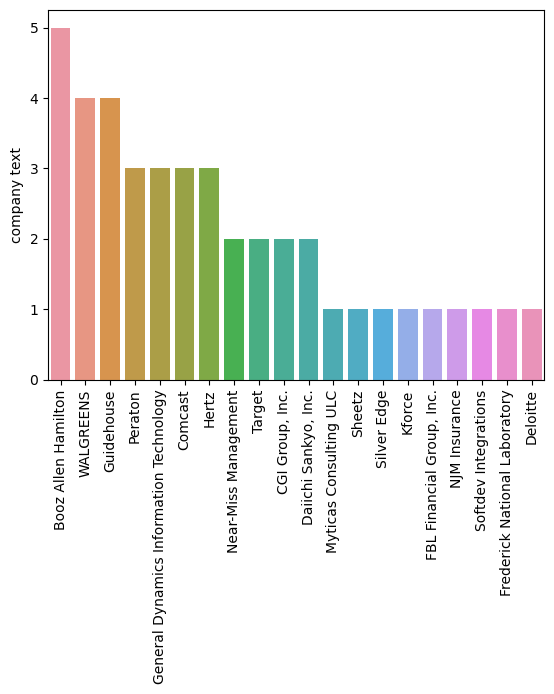

In [26]:
for i in df_cat[['Location','company text']].columns:
    cat_ind = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i,len(cat_ind)))
    chart = sns.barplot(x = cat_ind.index, y = cat_ind)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [27]:
pd.pivot_table(df, index = 'job_simplify', values = 'avg_salary')

,avg_salary
job_simplify,
data analyst,104.277778
data engineer,144.250000
data scientist,126.416667
director,163.875000
manager,114.500000
mle,128.857143
na,135.708333


In [28]:
pd.pivot_table(df, index = ['job_simplify','seniority'], values = 'avg_salary')

avg_salary
job_simplify   seniority            
data analyst   na          50.000000
               senior     111.062500
data engineer  na         144.250000
data scientist junior      86.500000
               na         117.987500
               senior     141.500000
director       na         163.875000
manager        na         114.500000
mle            na         109.375000
               senior     154.833333
na             na         120.863636
               senior     148.269231

In [29]:
pd.pivot_table(df, index = ['job_state','job_simplify'], values = 'avg_salary',aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplify              
 WA       na                       1
 VA       na                       1
          mle                      2
          data scientist          11
          data engineer            1
          data analyst             2
 UT       data scientist           2
 TX       na                       3
          data scientist           3
 TN       mle                      1
 SC       data analyst             1
 RI       data scientist           1
 PA       data scientist           6
          data analyst             2
          na                       1
          manager                  1
 OR       na                       1
 OH       data scientist           1
 NY       na                       1
          data scientist           1
          data analyst             2
 NV       data analyst             1
 NM       data scientist           1
 NJ       na                       3
          director                 1
          data scientist           1
 NE       manager                  1
 NC       data scientist           1
 MO       data scientist           1
 MN       mle                      1
          data scientist           2
 MI       mle                      1
 MD       na                       1
          data scientist           7
 MA       na                       1
          mle                      1
          director                 1
          data scientist           2
 LA       data scientist           1
 KS       data scientist           2
 IL       director                 1
          data scientist           7
          na                       1
 IA       na                       1
 GA       data scientist           2
 FL       na                       2
          data scientist           6
          data analyst             1
 DC       na                       2
          data scientist           3
 CT       data scientist           1
          data engineer            1
 CA       na                       2
          data scientist           1
 AL       data scientist           1

In [30]:
pd.pivot_table(df[df.job_simplify == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,265.000000
AL,152.500000
MN,148.500000
VA,141.636364
MD,134.857143
DC,133.833333
PA,132.500000
MA,130.500000
IL,128.071429


In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'job_simplify',
       'seniority', 'desc_len'],
      dtype='object')

In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'Type of ownership','avg_salary']]

In [33]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 3.6    170.200000
 4.7    170.000000
 4.2    149.750000
 4.1    146.083333
 3.7    140.583333
 5.0    138.500000
 3.9    130.384615
 4.5    130.000000
 4.8    130.000000
 3.4    126.000000
 2.8    123.500000
-1.0    122.125000
 4.0    118.846154
 3.8    118.125000
 3.2    117.500000
 4.3    116.000000
 4.6    115.000000
 3.1    113.687500
 3.5    106.200000
 3.0    101.000000
 4.4     90.500000
 3.3     86.500000
Industry
                                          avg_salary
Industry                                            
General Merchandise & Superstores         265.000000
Internet & Web Services                   171.000000
Computer Hardware Development             159.000000
Information Technology Support Services   158.000000
Telecommunications Services               145.166667
Aerospace & Defense                       144.555556
Energy & Utilities                        140.500000
Drug & Health Stores                      137.62500

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'job_simplify',
       'seniority', 'desc_len'],
      dtype='object')

In [35]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $5 billion (USD),1,7
$1 to $5 million (USD),2,1
$10+ billion (USD),7,20
$100 to $500 million (USD),1,2
$25 to $100 million (USD),3,7
$5 to $10 billion (USD),4,10
$5 to $25 million (USD),1,2
$500 million to $1 billion (USD),1,4
-1,6,8


In [36]:
df.to_csv(r"C:\Users\vams\OneDrive\Desktop\My files\Masters stuff\STUDY\PROJECTS\Data science salary\ds_salary_proj\data_eda.csv")

## Word Cloud

In [59]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [65]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vams\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

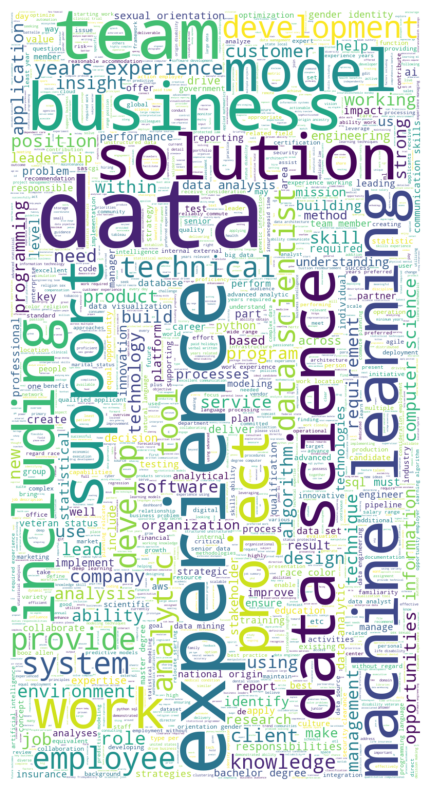

In [71]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    # remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = "white", random_state=1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()